In [1]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Tweets.csv',names=['data'])


In [6]:
df.head()

data
0  (0, '591764470197723137', '#Nepal #news Adding...
1  (0, '591779538046218240', "The massacre of peo...
2  (0, '591728244925210624', "I'm lonely, maybe y...
3  (0, '591774433926193152', '#nepal #news 6 bill...
4  (0, '591764472651386882', '#Nepal #news Indian...

In [7]:
for col in df:
    df[col] =df[col].astype(str).str.replace("(","").str.replace(")","")

<ipython-input-7-9f076349d8c7>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[col] =df[col].astype(str).str.replace("(","").str.replace(")","")


In [8]:
df = df['data'].str.split(',', expand=True)

In [9]:
df = df.fillna(value=" ")

In [10]:
df["texts"] = df[2].map(str)+df[3].map(str)+df[4].map(str)+df[5].map(str)+df[6].map(str)+df[7].map(str)+df[8].map(str)

In [11]:
df = df.drop(columns=[2,3,4,5,6,7,8],axis = 1)

In [12]:
df.head()

0                      1                                              texts
0  0   '591764470197723137'   '#Nepal #news Adding to Bhutanese Refugees Bh...
1  0   '591779538046218240'   "The massacre of people's movement says peace...
2  0   '591728244925210624'   "I'm lonely maybe you're going to die without...
3  0   '591774433926193152'   '#nepal #news 6 billion collection collection...
4  0   '591764472651386882'   '#Nepal #news Indian proposal to crash airpor...

In [13]:
df.columns = ['TweetClass','TweetId','Tweet'] 

In [16]:
df = df.drop(['TweetId'], axis=1)

In [17]:
df.head()

TweetClass                                              Tweet
0          0   '#Nepal #news Adding to Bhutanese Refugees Bh...
1          0   "The massacre of people's movement says peace...
2          0   "I'm lonely maybe you're going to die without...
3          0   '#nepal #news 6 billion collection collection...
4          0   '#Nepal #news Indian proposal to crash airpor...

In [18]:
df.shape

(18226, 2)

In [19]:
df['TweetClass'].value_counts()

0    17370
2      658
1      198
Name: TweetClass, dtype: int64

In [20]:
df0 = df[df['TweetClass'] == '0']
df1 = df[df['TweetClass'] == '1'] 
df2 = df[df['TweetClass'] == '2']

<Axes: ylabel='TweetClass'>

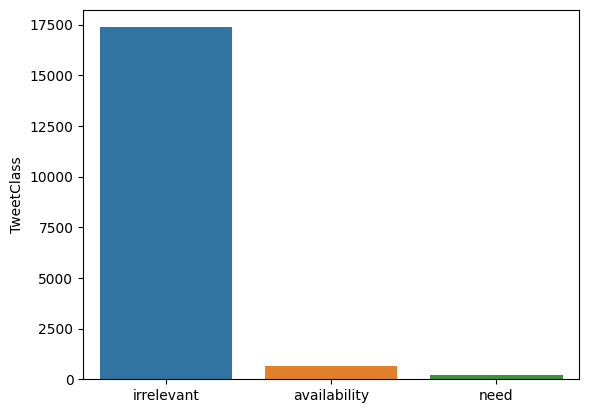

In [21]:
sns.barplot(x = ["irrelevant", 'availability','need'], y = df['TweetClass'].value_counts(), data=df)

# New Section

In [22]:
df0.head()

TweetClass                                              Tweet
0          0   '#Nepal #news Adding to Bhutanese Refugees Bh...
1          0   "The massacre of people's movement says peace...
2          0   "I'm lonely maybe you're going to die without...
3          0   '#nepal #news 6 billion collection collection...
4          0   '#Nepal #news Indian proposal to crash airpor...

In [23]:
df1.head()

TweetClass                                              Tweet
17370          1   'Nepal seeks mobile medical assistance from I...
17371          1   'Nepalis r w/o water &amp electricity Water i...
17372          1   'The wounded and untimely families need to ta...
17373          1   'they are in search of blood donors for the p...
17374          1   'Walked all around central &amp old KTM.Shops...

In [24]:
df2.head()

TweetClass                                              Tweet
17568          2   'Indian Prime Minister Narendra Modi has anno...
17569          2   'Phone from NTC does not take money when you ...
17570          2   'India has sent 5 helicopters for relief and ...
17571          2   'NDRF personnel relief material was sent to N...
17572          2   '#SriLanka to fly emergency medical help food...

In [25]:
import pandas as pd
import nltk
import re
import string
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

stop_words = stopwords.words()

def cleaning(text):        
    # converting to lowercase, removing URL links, special characters, punctuations...
    text = text.lower()
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('[’“”…]', '', text)     

    # removing the emojies               
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)   
    
    # removing the stop-words          
    text_tokens = word_tokenize(text)
    tokens_without_sw = [word for word in text_tokens if not word in stop_words]
    filtered_sentence = (" ").join(tokens_without_sw)
    text = filtered_sentence
    
    return text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [26]:
dt = df1['Tweet'].apply(cleaning)

from collections import Counter
p = Counter(" ".join(dt).split()).most_common(50)
rslt = pd.DataFrame(p, columns=['Word', 'Frequency'])
print(rslt)

               Word  Frequency
0             nepal        153
1              food         80
2             water         73
3        earthquake         68
4             blood         43
5               amp         24
6   nepalearthquake         23
7            needed         20
8           shelter         19
9            donate         19
10            tents         18
11        kathmandu         18
12         medicine         16
13           rescue         16
14          medical         15
15        medicines         13
16           urgent         13
17          victims         13
18            india         12
19         urgently         12
20          provide         11
21       nepalquake         11
22              aid         10
23             send         10
24           relief         10
25         shortage         10
26              plz          9
27        hospitals          9
28        survivors          8
29         hospital          8
30              pls          8
31      

In [27]:
dt = df2['Tweet'].apply(cleaning)

from collections import Counter
p = Counter(" ".join(dt).split()).most_common(50)
rslt = pd.DataFrame(p, columns=['Word', 'Frequency'])
print(rslt)

                        Word  Frequency
0                      nepal        582
1                       send        235
2                 earthquake        233
3                       food        218
4                    medical        146
5                     relief        119
6                      water        104
7                    packets        103
8                      delhi        103
9                        amp         98
10                     india         87
11                     teams         86
12                   sending         75
13                       000         75
14                      team         71
15                   victims         70
16                     daily         63
17                    rescue         62
18           nepalearthquake         61
19                      sikh         58
20                    temple         56
21                     meals         53
22                       aid         52
23                  hospital         51


In [28]:
def wordBarGraphFunction(df,column,title):
    topic_words = [ z.lower() for y in
                       [ x.split() for x in df[column] if isinstance(x, str)]
                       for z in y]
    word_count_dict = dict(Counter(topic_words))
    popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
    popular_words_nonstop = [w for w in popular_words if w not in stopwords.words("english")]
    plt.barh(range(50), [word_count_dict[w] for w in reversed(popular_words_nonstop[0:50])])
    plt.yticks([x + 0.5 for x in range(50)], reversed(popular_words_nonstop[0:50]))
    plt.title(title)
    plt.show()

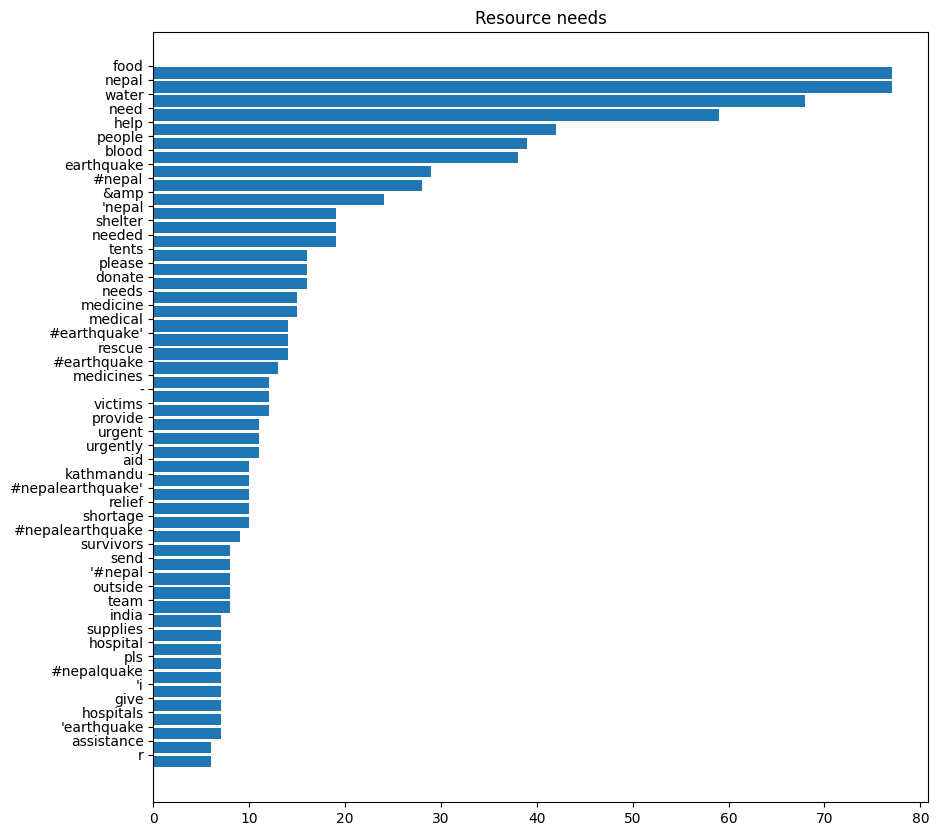

In [29]:
plt.figure(figsize=(10,10))
wordBarGraphFunction( df1,'Tweet',"Resource needs")

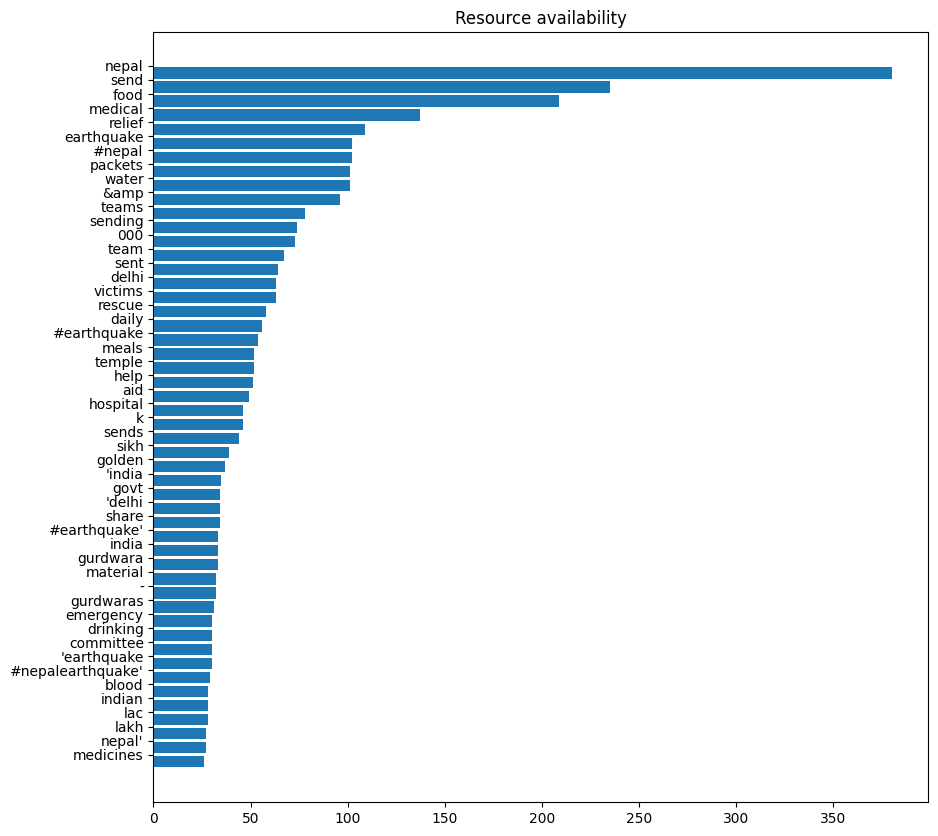

In [30]:
plt.figure(figsize=(10,10))
wordBarGraphFunction( df2,'Tweet',"Resource availability")

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

need_vect = CountVectorizer(stop_words='english')

available_vect = CountVectorizer(stop_words='english')

need_dtm = need_vect.fit_transform(df1['Tweet'].apply(cleaning))
available_dtm = available_vect.fit_transform(df2['Tweet'].apply(cleaning))

In [33]:
need_word = need_vect.get_feature_names_out()
need_freqs = need_dtm.sum(axis=0).A1
need_result = dict(zip(need_word,need_freqs))
print(len(need_word))

708


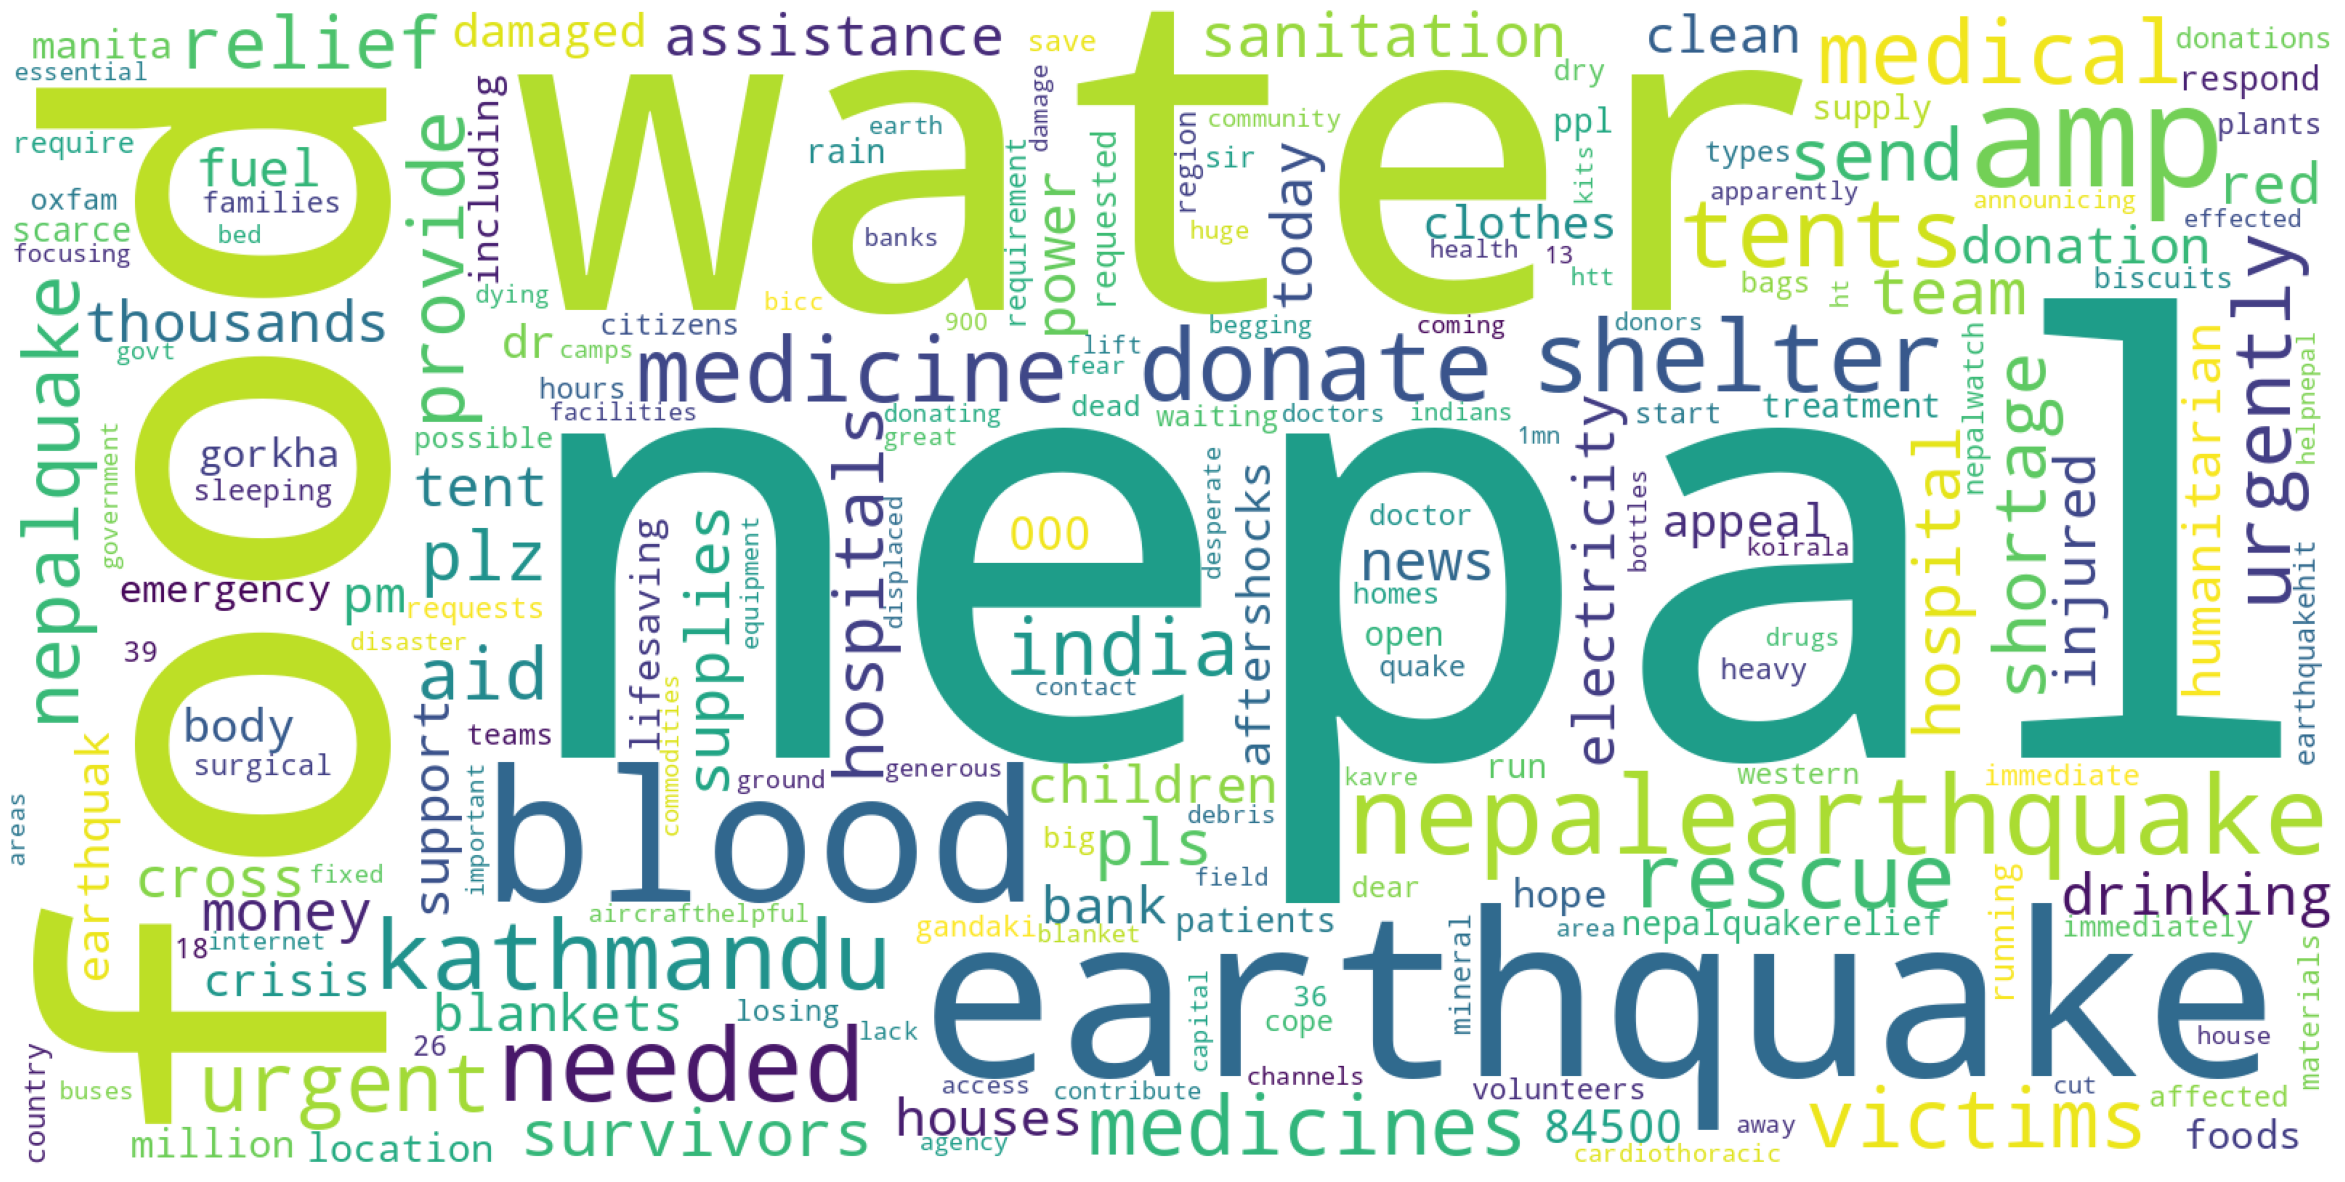

In [34]:
from wordcloud import WordCloud,STOPWORDS

wordcloud = WordCloud(background_color='white',
                        width=1600,
                        height=800,
                      stopwords=STOPWORDS,
                    ).generate_from_frequencies(need_result)

fig = plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.axis('off')
fig.savefig("need_word_cloud.png")
plt.show()

In [36]:
available_word = available_vect.get_feature_names_out()
available_freqs = available_dtm.sum(axis=0).A1
available_result = dict(zip(available_word,available_freqs))
print(len(available_word))

1509


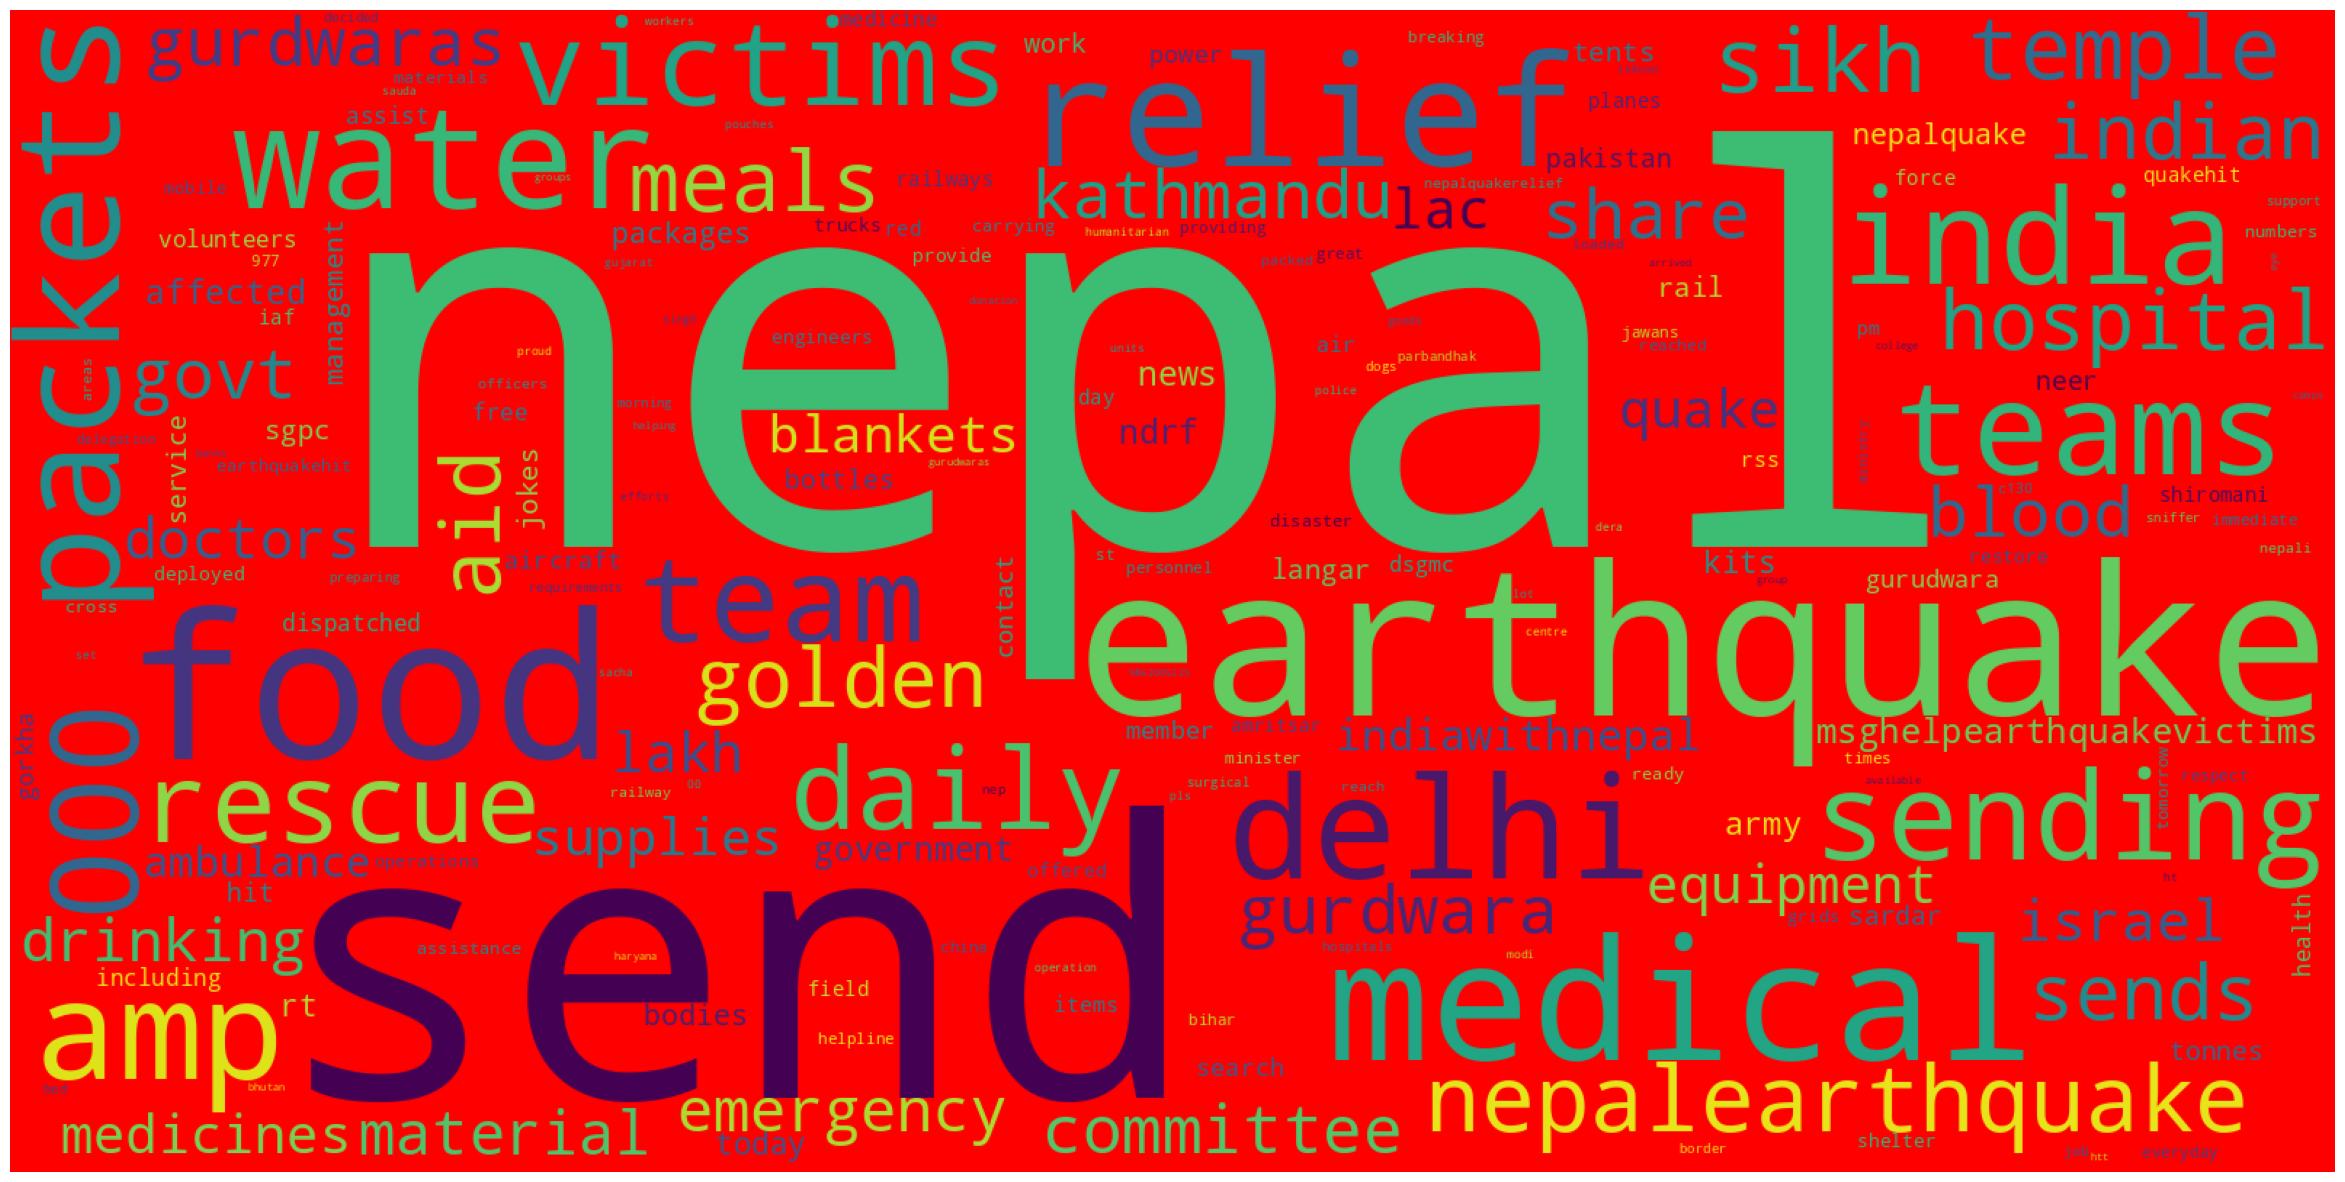

In [37]:
from wordcloud import WordCloud,STOPWORDS

wordcloud = WordCloud(background_color='red',
                        width=1600,
                        height=800,
                      stopwords=STOPWORDS,
                    ).generate_from_frequencies(available_result)

fig = plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.axis('off')
fig.savefig("available_word_cloud.png")
plt.show()

**BERT CLASSIFICATION**

In [38]:
#get unique values
possible_labels = df.TweetClass.unique()
print(possible_labels)

['0' '1' '2']


In [39]:
label_dict = {}
for index, possible_label in enumerate(possible_labels):
    label_dict[possible_label] = index

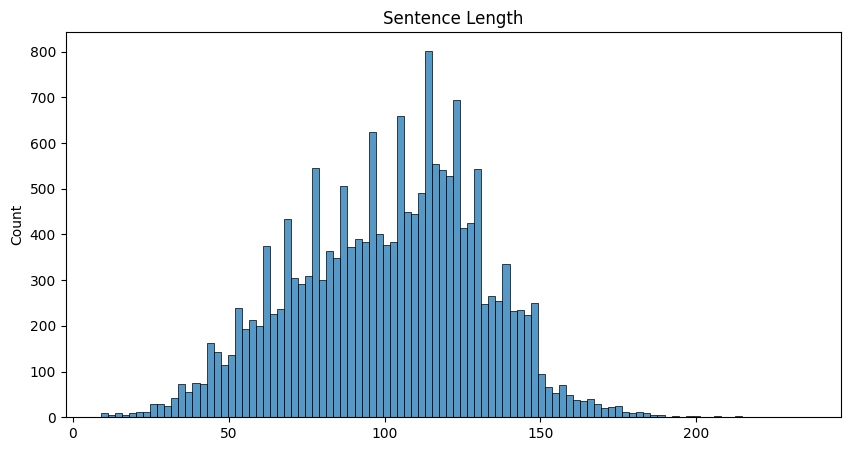

In [40]:
#need equal length sentences
#plot hist of sentence length
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.histplot([len(s) for s in df.Tweet], bins=100)
plt.title('Sentence Length')
plt.show()

In [41]:
max_len = max([len(sent) for sent in df.Tweet])
print('Max length: ', max_len)

Max length:  235


In [42]:
from sklearn.model_selection import train_test_split

#train test split
X_train, X_val, y_train, y_val = train_test_split(df.index.values, 
                                                   df.TweetClass.values,
                                                   test_size = 0.15,
                                                   random_state = 17,
                                                   stratify = df.TweetClass.values)

In [43]:
df['data_type'] = ['not_set'] * df.shape[0]

In [44]:
df.loc[X_train, 'data_type'] = 'train'
df.loc[X_val, 'data_type'] = 'val'

#groupby count
df.groupby(['TweetClass', 'data_type']).count()

Tweet
TweetClass data_type       
0          train      14765
           val         2605
1          train        168
           val           30
2          train        559
           val           99

In [45]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 69.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 KB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 33.3 MB/s eta 0:00:00


In [46]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased',
                                         do_lower_case = True)

In [47]:
df.head()

TweetClass                                              Tweet data_type
0          0   '#Nepal #news Adding to Bhutanese Refugees Bh...     train
1          0   "The massacre of people's movement says peace...     train
2          0   "I'm lonely maybe you're going to die without...       val
3          0   '#nepal #news 6 billion collection collection...     train
4          0   '#Nepal #news Indian proposal to crash airpor...     train

In [48]:
#encode train set
encoded_data_train = tokenizer.batch_encode_plus(df[df.data_type == 'train'].Tweet.values,
                                                add_special_tokens = True,
                                                return_attention_mask = True,
                                                pad_to_max_length = True,
                                                max_length = 256,
                                                return_tensors = 'pt')
                                                
#encode validation set
encoded_data_val = tokenizer.batch_encode_plus(df[df.data_type == 'val'].Tweet.values,
                                                add_special_tokens = True,
                                                return_attention_mask = True,
                                                pad_to_max_length = True,
                                                max_length = 256,
                                                return_tensors = 'pt')

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.9/dist-packages/transformers/tokenization_utils_base.py:2346: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/transformers/tokenization_utils_base.py:2346: FutureWarning: 

In [49]:
import numpy as np
np_array = np.array(df[df.data_type == 'train'].TweetClass.values)
np_array = np_array.astype(np.int)


npp_array = np.array(df[df.data_type == 'val'].TweetClass.values)
npp_array = npp_array.astype(np.int)


<ipython-input-49-06363b196404>:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np_array = np_array.astype(np.int)
<ipython-input-49-06363b196404>:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for m

In [50]:
#train set
import torch
input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(np_array, dtype=torch.long) 
 


#validation set
input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
labels_val = torch.tensor(npp_array,dtype=torch.long)


In [51]:
print(labels_train)

tensor([0, 0, 0,  ..., 2, 2, 2])


In [52]:
from transformers import BertForSequenceClassification

model = BertForSequenceClassification.from_pretrained('bert-base-uncased',
                                                      num_labels = len(label_dict),
                                                      output_attentions = False,
                                                      output_hidden_states = False)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [53]:
from torch.utils.data import TensorDataset

#train set
dataset_train = TensorDataset(input_ids_train, 
                              attention_masks_train,
                              labels_train)

#validation set
dataset_val = TensorDataset(input_ids_val, 
                             attention_masks_val, 
                             labels_val)

In [54]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

batch_size = 32

#train set
dataloader_train = DataLoader(dataset_train,
                              sampler = RandomSampler(dataset_train),
                              batch_size = batch_size)

#validation set
dataloader_val = DataLoader(dataset_val,
                              sampler = RandomSampler(dataset_val),
                              batch_size = 32) #since we don't have to do backpropagation for this step

In [55]:
from transformers import AdamW, get_linear_schedule_with_warmup

optimizer = AdamW(model.parameters(),
                 lr = 1e-5,
                 eps = 1e-8) #2e-5 > 5e-5
                 
epochs = 10

scheduler = get_linear_schedule_with_warmup(optimizer,
                                           num_warmup_steps = 0,
                                           num_training_steps = len(dataloader_train)*epochs)

/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [56]:
def evaluate(dataloader_val):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)
    #evaluation mode 
    model.eval()
    
    #tracking variables
    loss_val_total = 0
    predictions, true_vals = [], []
    
    for batch in tqdm(dataloader_val):
        
        #load into GPU
        batch = tuple(b.to(device) for b in batch)
        
        #define inputs
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2]}

        #compute logits
        with torch.no_grad():        
            outputs = model(**inputs)
        
        #compute loss
        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        #compute accuracy
        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)
    
    #compute average loss
    loss_val_avg = loss_val_total/len(dataloader_val) 
    
    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)
            
    return loss_val_avg, predictions, true_vals

In [57]:
import numpy as np
from sklearn.metrics import f1_score

def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis = 1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average = 'weighted')

In [58]:
#accuracy score
def accuracy_per_class(preds, labels):
    label_dict_inverse = {v: k for k, v in label_dict.items()}
    
    #make prediction
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    
    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f'Class: {label_dict_inverse[label]}')
        print(f'Accuracy:{len(y_preds[y_preds==label])}/{len(y_true)}\n')

In [59]:
import random

seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

In [60]:
from tqdm import tqdm

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

for epoch in tqdm(range(1, epochs+1)):
    model.to(device)
    model.train()
    
    loss_train_total = 0
    
    progress_bar = tqdm(dataloader_train, 
                        desc = 'Epoch {:1d}'.format(epoch), 
                        leave = False, 
                        disable = False)
    
    for batch in progress_bar:
        
        model.zero_grad() #set gradient to 0
    
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids': batch[0], 
                  'attention_mask': batch[1], 
                  'labels': batch[2]}
        
        outputs = model(**inputs) #unpack the dict straight into inputs
        
        loss = outputs[0]
        loss_train_total += loss.item()
        loss.backward()
        
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        
        optimizer.step()
        scheduler.step()
        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item() / len(batch))})
        
    torch.save(model.state_dict(), f'/content/gdrive/MyDrive/BE_Major_Project/Models2/BERT_ft_epoch{epoch}.model')
    
    tqdm.write('\n Epoch {epoch}')
    
    loss_train_avg = loss_train_total / len(dataloader_train)
    tqdm.write(f'Training loss: {loss_train_avg}')
    
    val_loss, predictions, true_vals = evaluate(dataloader_val)
    val_f1 = f1_score_func(predictions, true_vals)
    tqdm.write(f'Validation loss: {val_loss}')
    tqdm.write(f'F1 Score (weighted): {val_f1}')

  0%|          | 0/10 [10:47<?, ?it/s]


 Epoch {epoch}
Training loss: 0.15080576798465756



 10%|█         | 1/10 [11:30<1:43:38, 690.99s/it]

Validation loss: 0.08373214773086528
F1 Score (weighted): 0.9623402899715331



 10%|█         | 1/10 [22:17<1:43:38, 690.99s/it]


 Epoch {epoch}
Training loss: 0.07036088993316804



 20%|██        | 2/10 [23:01<1:32:05, 690.63s/it]

Validation loss: 0.07618028269051899
F1 Score (weighted): 0.9726907286510005



 20%|██        | 2/10 [33:47<1:32:05, 690.63s/it]


 Epoch {epoch}
Training loss: 0.04694446467160795



 30%|███       | 3/10 [34:31<1:20:32, 690.34s/it]

Validation loss: 0.1024355186064197
F1 Score (weighted): 0.9738576803363425



 30%|███       | 3/10 [45:18<1:20:32, 690.34s/it]


 Epoch {epoch}
Training loss: 0.03128573036339787



 40%|████      | 4/10 [46:01<1:09:02, 690.43s/it]

Validation loss: 0.11593414004384486
F1 Score (weighted): 0.9730628402580456



 40%|████      | 4/10 [56:48<1:09:02, 690.43s/it]


 Epoch {epoch}
Training loss: 0.025486658306458736



 50%|█████     | 5/10 [57:32<57:31, 690.32s/it]  

Validation loss: 0.1179714955790185
F1 Score (weighted): 0.9730619635209068



 50%|█████     | 5/10 [1:08:18<57:31, 690.32s/it]


 Epoch {epoch}
Training loss: 0.01588017976093922



 60%|██████    | 6/10 [1:09:02<46:01, 690.26s/it]

Validation loss: 0.13000864263483172
F1 Score (weighted): 0.9720251369508356



 60%|██████    | 6/10 [1:19:49<46:01, 690.26s/it]


 Epoch {epoch}
Training loss: 0.011066821378538117



 70%|███████   | 7/10 [1:20:32<34:31, 690.37s/it]

Validation loss: 0.14329111754307441
F1 Score (weighted): 0.9727634979582749



 70%|███████   | 7/10 [1:31:19<34:31, 690.37s/it]


 Epoch {epoch}
Training loss: 0.0087848373442425



 80%|████████  | 8/10 [1:32:03<23:01, 690.51s/it]

Validation loss: 0.14488624080983098
F1 Score (weighted): 0.973874334529544



 80%|████████  | 8/10 [1:42:50<23:01, 690.51s/it]


 Epoch {epoch}
Training loss: 0.00570927656594107



 90%|█████████ | 9/10 [1:43:34<11:30, 690.68s/it]

Validation loss: 0.14711850225437448
F1 Score (weighted): 0.9742898243164329



 90%|█████████ | 9/10 [1:54:21<11:30, 690.68s/it]


 Epoch {epoch}
Training loss: 0.005176754646362094



100%|██████████| 10/10 [1:55:04<00:00, 690.50s/it]

Validation loss: 0.1519073016604315
F1 Score (weighted): 0.9735408222210543


In [61]:

model.load_state_dict(torch.load("/content/gdrive/MyDrive/BE_Major_Project/Models2/BERT_ft_epoch10.model",map_location=torch.device('cpu')))

<All keys matched successfully>

In [62]:
from tqdm import tqdm
_, predictions, true_vals = evaluate(dataloader_val)

100%|██████████| 86/86 [00:45<00:00,  1.91it/s]


In [63]:
accuracy_per_class(predictions, true_vals)

Class: 0
Accuracy:2568/2605

Class: 1
Accuracy:21/30

Class: 2
Accuracy:72/99



In [64]:
 preds_flat = np.argmax(predictions, axis=1).flatten()
 labels_flat = true_vals.flatten()

In [65]:
from sklearn.metrics import classification_report

In [66]:
print(classification_report(labels_flat,preds_flat, target_names = ['0', '1', '2'] , digits = 4))

              precision    recall  f1-score   support

           0     0.9873    0.9858    0.9866      2605
           1     0.6176    0.7000    0.6562        30
           2     0.7273    0.7273    0.7273        99

    accuracy                         0.9733      2734
   macro avg     0.7774    0.8044    0.7900      2734
weighted avg     0.9738    0.9733    0.9735      2734



In [67]:
 possible_labels = ['0', '1', '2']

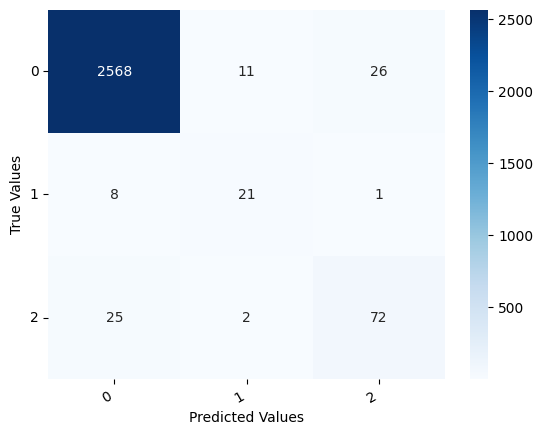

In [68]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

def show_confusion_matrix(confusion_matrix):
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
  plt.ylabel('True Values')
  plt.xlabel('Predicted Values');
cm = confusion_matrix(labels_flat,preds_flat)
df_cm = pd.DataFrame(cm, index= possible_labels, columns= possible_labels)
show_confusion_matrix(df_cm)